# NumPy Random Package

The ability to generate random numbers is an important part of any simulation. For this purpose, NumPy provides various functions in the submodule **random**. It uses an  algorithm called the Mersenne Twister to generate pseudorandom numbers. [1]

We first need to define a seed that makes the random numbers predictable. When the value is reset, the same numbers will appear every time. If we do not assign the seed, NumPy automatically selects a random seed value based on the system's random number generator device or on the clock.[1]

Here are a few examples of NumPy Random functions that are frequently used: 

### 1. rand
This function creates an array of the given shape and populates it with random samples from a uniform distribution over [0, 1). [2]

**Syntax:** numpy.random.rand(d0, d1, ..., dn)

**Input Parameters:** The dimensions of the returned array. They should all be positive integers. If no argument is given a single Python float is returned.

**Returns:**  ndarray of shape (d0, d1, ..., dn)

In [1]:
#This returns a ndarray of shape (2,3)
import numpy as np
np.random.rand(2,3)

array([[0.64428972, 0.71394455, 0.98138201],
       [0.56913373, 0.47595442, 0.931486  ]])

### 2. randint

This function returns random integers from the 'discrete uniform' distribution of the specified dtype in the 'half-open' interval [low, high). 
If the value of high is None, then results are from [0, low). [3]

**Syntax:** numpy.random.randint(low, high=None, size=None, dtype='l')

**Input Parameters:** low - Lowest integer to be drawn from the distribution.

high - This is optional. The largest integer to be drawn from the distribution will be one less than this value.

size - Output shape. Must be int or tuple of ints.

dtype - Desired datatype of the result. The default value is ‘np.int’.
                                    
**Returns:** Size-shaped array of random integers from the appropriate distribution. If size not provided, then a single int is returned.

In [2]:
#Generate array of size 5 with values between 0 and 2
np.random.randint(3, size=5)

array([2, 1, 0, 0, 1])

In [3]:
#Generate 2D array with values between 0 and 4
np.random.randint(5, size=(3, 2))

array([[1, 0],
       [1, 1],
       [2, 4]])

### 3. random
This function returns random floats in the half-open interval [0.0, 1.0). [4]

**Syntax:** numpy.random.random(size=None)

**Input Parameters:** size - This is the Output shape. Must be int or tuple of ints.

**Returns:** Array of random floats of shape size

In [4]:
#Generate 2D array with values between 0 and 1
np.random.random_sample((4, 3))

array([[0.21780061, 0.44102551, 0.56357905],
       [0.40953904, 0.77740032, 0.59164519],
       [0.11112444, 0.05297213, 0.04475818],
       [0.95081051, 0.60170071, 0.00297586]])

### 4. choice
This function generates a random sample from a given 1-D array. [5]

**Syntax:** numpy.random.choice(a, size=None, replace=True, p=None)

**Input Parameters:** a - Array or int. For an ndarray a random sample is generated from its elements. For an int, the random sample is generated as if a were np.arange(a).

size - It is the Output shape. Must be int or tuple of ints.         
            
replace - Whether the sample is with or without replacement       

p - The probabilities associated with each entry in a.
    
**Returns:** The generated random samples. Will be single item or ndarray.

In [5]:
#Generate a uniform random sample from np.arange(10) of size 5 without replacement:
np.random.choice(10, 5, replace=False)
#This is equivalent to np.random.permutation(np.arange(10))[:5]

array([3, 1, 5, 9, 4])

### 5. permutation
This function randomly permutes a sequence or returns a permuted range. [6]

**Syntax:** numpy.random.permutation(x)

**Input Parameters:** x - Randomly permutes np.arange(x) if x is an integer. If x is an array it makes a copy and shuffles the elements randomly.

**Returns:** Permuted sequence or array range

In [6]:
#This creates an array of length 5 with values from 0 to 4. 
np.random.permutation(5)

array([0, 1, 4, 3, 2])

In [7]:
#This shuffles the elements in the array randomly.
np.random.permutation([2, 3, 4, 8, 13, 15, 21, 29, 30])

array([15, 29,  2,  3,  4,  8, 21, 30, 13])

<br>
## Frequency Distributions
Here are a few examples of NumPy Frequency Distributions that are commonly used:
### 1. normal
This function draws random samples from a normal (Gaussian) distribution. [7]

**Syntax:** numpy.random.normal(mean=0.0, sd=1.0, size=None)

**Input Parameters:** mean - Mean of the distribution.

sd - Standard deviation of the distribution.

size - Shape of the output. 

**Returns:** Drawn samples from the parameterized normal distribution.

In [8]:
mean, sd = 5, 0.2 # mean and standard deviation [7]
s = np.random.normal(mean, sd, 1000)

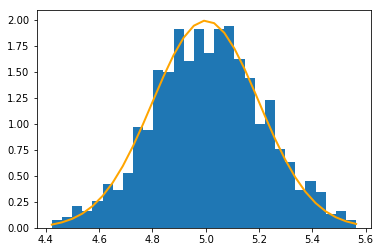

In [9]:
#We now plot a histogram [7]
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sd * np.sqrt(2 * np.pi)) * 
         np.exp( - (bins - mean)**2 / (2 * sd**2) ), linewidth=2, color='orange')
plt.show()

### 2. gamma

This function draws samples from a Gamma distribution. [8]

**Syntax:** numpy.random.gamma(shape, scale=1.0, size=None)

**Input Parameters:** shape - The shape of the gamma distribution. Value should be greater than zero.

scale - The scale of the gamma distribution. Default is equal to 1.

size - Shape of the output.

**Returns:** Drawn samples from the parameterized gamma distribution. Will be ndarray or scalar values.

In [10]:
#Gamma distribution [8]
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000)

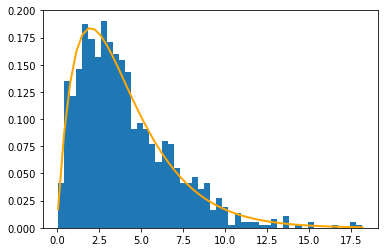

In [11]:
#Display the histogram of the samples, along with the probability density function: [8]
import scipy.special as sps
count, bins, ignored = plt.hist(s, 50, normed=True)
y = bins**(shape-1)*(np.exp(-bins/scale) / (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='orange')
plt.show()

### 3. logistic

This function draws samples from a logistic distribution. [9]

**Syntax:** numpy.random.logistic(mean=0.0, scale=1.0, size=None)

**Input Parameters:** mean - Parameter of the distribution. Default is 0.

scale - Parameter of the distribution. Should be greater than zero. Default is 1.

size - Shape of the output.

**Returns:** Drawn samples from the parameterized logistic distribution. Will be ndarray or scalar values.

In [12]:
#Draw samples from the distribution: [9]
mean, scale = 5, 2
s = np.random.logistic(mean, scale, 15000)
count, bins, ignored = plt.hist(s, bins=50)

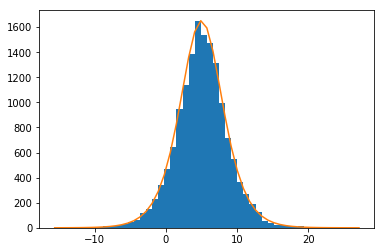

In [13]:
# plot against distribution [9]
def logistic(x, mean, scale):
    return np.exp((mean-x)/scale)/(scale*(1+np.exp((mean-x)/scale))**2)
plt.plot(bins, logistic(bins, mean, scale)*count.max()/ logistic(bins, mean, scale).max())
plt.show()

### 4. lognormal
This function draws samples from a log-normal distribution. [10]

**Syntax:** numpy.random.lognormal(mean=0.0, sigma=1.0, size=None)

**Input Parameters:** mean - Mean value of the underlying normal distribution. Default is 0.

sigma - Standard deviation of the underlying normal distribution. Should be greater than zero. Default is 1.

size - Shape of the output.

**Returns:** Drawn samples from the parameterized log-normal distribution. Will be ndarray or scalar values.

In [14]:
#Draw samples from the distribution: [10]
mean, sd = 5., 1. # mean and standard deviation
s = np.random.lognormal(mean, sd, 750)

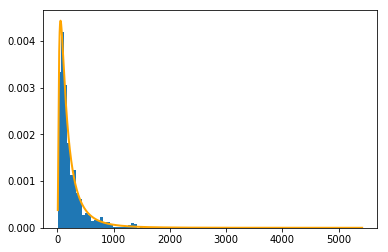

In [15]:
#Display the histogram of the samples, along with the probability density function:[10]
count, bins, ignored = plt.hist(s, 100, normed=True, align='mid')
x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mean)**2 / (2 * sd**2)) / (x * sd * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, linewidth=2, color='orange')
plt.axis('tight')
plt.show()

### 5. poisson

This function draws samples from a Poisson distribution. The Poisson distribution is the limit of the binomial distribution for large N. [11]

**Syntax:** numpy.random.poisson(lam=1.0, size=None)

**Input Parameters:** lam - Expectation of interval. Should be greater than or equal to zero. 

size - Shape of the output.

**Returns:** Drawn samples from the parameterized Poisson distribution. Will be ndarray or scalar values.

In [16]:
#Draw samples from the distribution: [11]
s = np.random.poisson(8, 50000)

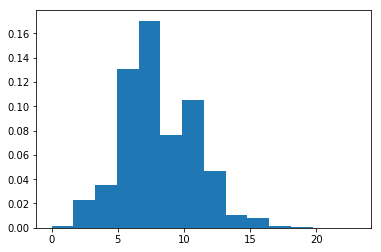

In [17]:
#Display histogram of the sample: [11]
count, bins, ignored = plt.hist(s, 14, normed=True)
plt.show()

### References:
1. https://www.packtpub.com/mapt/book/big_data_and_business_intelligence/9781785285110/2/ch02lvl1sec16/numpy-random-numbers
2. https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.rand.html#numpy.random.rand
3. https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.randint.html#numpy.random.randint
4. https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.random.html#numpy.random.random
5. https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.choice.html#numpy.random.choice
6. https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.permutation.html#numpy.random.permutation
7. https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html#numpy.random.normal
8. https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.gamma.html#numpy.random.gamma
9. https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.logistic.html#numpy.random.logistic
10. https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.lognormal.html#numpy.random.lognormal
11. https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.poisson.html#numpy.random.poisson
